# Random Forest Regressor

In this assignmentm, I am using the data set called `amsterdom.json` which has details about properties listed on Airbnb in Amsterdom. 

The aim is to predict `price` for a property on Airbnb using the given atrributes.

The data set includes the attributes total number of bedrooms, bathrooms, guests, latitude, longitude, reviews, if the place is instantly bookable, room_type of the property.

In [1]:
import json

In [90]:
with open('C:\\Users\\Ajay\\Documents/amsterdam.json') as file:
  data = json.load(file)
#print(data) #run  jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 in anaconda terminal, to handle iopub data rate exceeded error

Lets convert the data into data frame type

In [6]:
import pandas as pd

dat=pd.DataFrame(data)

type(dat)

pandas.core.frame.DataFrame

### Lets explore the data to gain some understanding about it

In [7]:
dat.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


In [8]:
dat.columns #Variable names

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'room_type', 'instant_bookable'],
      dtype='object')

In [9]:
dat.shape

(15181, 13)

In [10]:
dat.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,52.426224,5.027689


In [11]:
print(dat['room_type'].describe())

dat['room_type'].value_counts()

count               15181
unique                  3
top       Entire home/apt
freq                11811
Name: room_type, dtype: object


Entire home/apt    11811
Private room        3306
Shared room           64
Name: room_type, dtype: int64

In [12]:
dat['instant_bookable'].describe()

dat['instant_bookable'].value_counts()

f    12810
t     2371
Name: instant_bookable, dtype: int64

In [13]:
dat.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

#### There are a few missing values. Since there very number of missing values, we can afford to omit them from the analysis

In [14]:
dat[dat['host_listings_count'].isnull()==True]

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
4243,NaN,2,1.0,1.0,2,3,20,1,$60.00,52.368725,4.927357,Entire home/apt,f
7673,NaN,4,1.0,1.0,1,3,19,1,$89.00,52.389669,4.880899,Entire home/apt,f
14498,NaN,2,1.0,1.0,1,1,1,1,$119.00,52.378448,4.857322,Private room,f


In [15]:
dat.dtypes 

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

**Variable price is not an integer type. Lets clean the variable `price` and convert it into numeric type**

In [16]:
dat['price']=dat['price'].str.replace('$',"")
dat['price']=dat['price'].str.replace(',',"")
dat['price'].head()

0    145.00
1     88.00
2    130.00
3    110.00
4    115.00
Name: price, dtype: object

In [18]:
#lets change the data type of price from object to float
dat['price']=dat['price'].apply(pd.to_numeric)
dat.dtypes

print(round(dat['price'].mean(),3))
round(dat['price'].max(),1)

134.799


3142.0

In [19]:
dat.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,134.799223,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,85.751273,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,90.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,118.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,3142.000000,52.426224,5.027689


Summary statistics of `price` variable shows that there are outliers. Lets omit those observations

In [20]:
import numpy as np

In [33]:
dat['price'].quantile(0.99)

440.0

In [35]:
dat_new=dat[dat['price']<=400]

dat_new['price'].quantile(0.99)

358.6999999999989

In [36]:
dat_new.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15008.000000,15011.000000,14993.000000,14999.000000,15011.000000,15011.000000,15011.000000,15011.000000,15011.000000,15011.000000,15011.000000
mean,3.369003,2.873493,1.115187,1.387759,1.495570,2.883685,17.828059,2.901605,129.582706,52.365306,4.889012
std,11.198228,1.280790,0.341810,0.834433,0.928649,7.249181,34.821111,8.830417,62.930878,0.015753,0.035011
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355583,4.864802
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364956,4.886348
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374804,4.907949
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,400.000000,52.424980,5.027689


Now the summary statistics for variable `price` looks better

In [37]:
dat.shape

#dat.dropna().shape

dat_final=dat_new.dropna()

dat_final.head()

dat_final.shape #number of rows has been reduced after removing obesrvations which have missing values

#print(type(dat_final))

(14978, 13)

**Lets derive a varible which shows how far a given property is located from the city center. Lets use `longitute` and `latitude` variables to calculate the variable `d_center`**

In [38]:
from math import radians, cos, sin, asin, sqrt

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


dat_final['d_center'] = haversine_np(4.899431,52.379189,dat_final['longitude'],dat_final['latitude'])

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
dat_final.sort_values(by='d_center',ascending=True)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_center
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,Private room,f,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,Shared room,f,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,Entire home/apt,f,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,Private room,t,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,Private room,f,0.206638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,1.0,3,1.0,1.0,2,2,37,1,40.0,52.290687,4.983784,Private room,f,11.381113
6779,1.0,4,1.0,3.0,1,3,1,1,101.0,52.292209,4.989963,Entire home/apt,f,11.454847
6791,1.0,2,1.0,1.0,1,1,22,1,50.0,52.292890,4.995102,Private room,t,11.583068
6766,1.0,2,1.0,1.0,1,2,5,1,50.0,52.291664,4.992333,Private room,f,11.592780


In [27]:
#The average price of Private Rooms that are less than or equal to 1 km from city centre is

dat_final[(dat_final['room_type']=="Private room")&(dat_final['d_center']<=1)]['price'].mean()


120.80666666666667

**Lets prepare data for random forest ensembel modelling**

In [40]:
dat_final.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_center
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,2.885443
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,Entire home/apt,f,2.919191
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,Entire home/apt,f,3.168346
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,Entire home/apt,f,2.876726


In [41]:
dat_final[['host_listings_count','calculated_host_listings_count']] #cross checking if host_listings_count and calculated_host_listings_count are same or not

#both the varibles are different

,host_listings_count,calculated_host_listings_count
0,1.0,1
1,1.0,1
2,1.0,1
3,2.0,2
4,1.0,1
...,...,...
15175,1.0,1
15176,2.0,1
15177,1.0,1
15179,1.0,1


In [42]:
dat_final.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                             float64
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
d_center                          float64
dtype: object

We drop remove `latitude` & `longitude` variables from the data, as they may not add significnce in the model as individual variables

In [43]:
X=dat_final.drop(['price','latitude','longitude'],axis=1) #Removing latitude & longitude variables
X.shape

(14978, 11)

In [45]:
y=dat_final['price'] #the target variable
y.shape

(14978,)

In [46]:
X['instant_bookable'].value_counts()
X['room_type'].value_counts()

Entire home/apt    11636
Private room        3278
Shared room           64
Name: room_type, dtype: int64

In [47]:
X=pd.get_dummies(X) #Creating dummy variables

X.head()
#X.shape

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,d_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,2.885443,1,0,0,1,0
2,1.0,2,1.0,1.0,2,2,4,1,2.919191,1,0,0,1,0
3,2.0,4,1.0,2.0,2,4,2,2,3.168346,1,0,0,1,0
4,1.0,2,1.0,1.0,1,3,10,1,2.876726,1,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [88]:
print(X_train.shape[0])
print(X_test.shape[0])

10484
4494


In [49]:
X_train['accommodates'].mean()

2.8670354826402136

In [50]:
X_test['accommodates'].mean()

print(2.9326732673267326 - 2.912949165330567)

abs(round(0.01972410199616581,3))

0.01972410199616581


0.02

In [51]:
from sklearn.ensemble import RandomForestRegressor

Lets fit a random forest ensemble model to the data. Here I am building a base model with no.of trees per model as 80

In [52]:
reg=RandomForestRegressor(n_estimators=80,oob_score=True,n_jobs=-1,random_state=200)

In [53]:
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                      oob_score=True, random_state=200, verbose=0,
                      warm_start=False)

In [54]:
reg.oob_score_

0.44825695861166814

In [55]:
reg.score(X_train,y_train)

0.9236333077265575

**Out of Bag (OOB) score tells us how well the model is performing on predicting `price` for out of bag observations**

Higher the OOB score better the model.

Now, lets build random forest ensemble models with no.of trees per model ranging from 30 to 600. Then check OOB score for each ensemble model, choose the one with highest OOB score.

In [58]:
list1=[]
list2=[]
for w in range(100,800,10):
    reg=RandomForestRegressor(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200,max_features="sqrt")
    reg.fit(X_train,y_train)
    oob=reg.oob_score_
    list1.append(str(w))
    list2.append(str(oob))
    
    #print ('For n_estimators' +str(w))
    #print ('OOB score is '+str(oob))
    #print ('************************')

In [60]:
# get the list of tuples from two lists.  
# and merge them by using zip()

list_of_tuples = list(zip(list1, list2)) 
list_of_tuples

df = pd.DataFrame(list_of_tuples, columns = ['No.of Trees', 'OBB Score'])

df.sort_values('OBB Score',ascending=False)

,No.of Trees,OBB Score
47,570,0.4758813864736674
46,560,0.47584052416131795
69,790,0.47582100255249293
60,700,0.47581483822401316
67,770,0.4758077327600041
...,...,...
4,140,0.4703025746324996
3,130,0.4690259632682455
2,120,0.4684999061815185
1,110,0.46619068336762715


**For n_estimators at 410 we get highest OOB Score. Lets build a model using the same hyper parameter**

In [61]:
reg=RandomForestRegressor(n_estimators=570,oob_score=True,random_state=200,max_features="sqrt")

In [62]:
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=570,
                      n_jobs=None, oob_score=True, random_state=200, verbose=0,
                      warm_start=False)

In [63]:
reg.oob_score_

0.4758813864736674

In [64]:
reg.score(X_train,y_train)

0.928589156604321

### Lets find out the feature importance in predicting `price`

In [66]:
reg.feature_importances_

array([0.02959625, 0.17037351, 0.05901182, 0.13060444, 0.06858002,
       0.05784304, 0.11248681, 0.02971333, 0.24365908, 0.04478484,
       0.03759553, 0.00115934, 0.00732134, 0.00727064])

In [67]:
imp_feat=pd.Series(reg.feature_importances_,index=X.columns.tolist())

In [68]:
imp_feat.sort_values(ascending=False)

d_center                          0.243659
accommodates                      0.170374
bedrooms                          0.130604
number_of_reviews                 0.112487
guests_included                   0.068580
bathrooms                         0.059012
minimum_nights                    0.057843
room_type_Entire home/apt         0.044785
room_type_Private room            0.037596
calculated_host_listings_count    0.029713
host_listings_count               0.029596
instant_bookable_f                0.007321
instant_bookable_t                0.007271
room_type_Shared room             0.001159
dtype: float64

### According to the random forest ensemble model, varibles `d_center`, `accomodates` and `bedrooms` play a significant role in price of a property listed on Airbnb Amsterdam

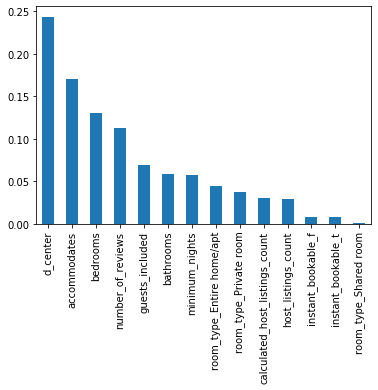

In [69]:
%matplotlib inline


imp_feat.sort_values(ascending=False).plot(kind='bar')

**Lets use the model on test sample to find out how well it's performing on unseen data**

In [81]:
y_pred=reg.predict(X_test) #predicing the testing sample data using the above model

y_pred

array([123.49649123,  71.1245614 , 260.77719298, ..., 148.22982456,
        62.24561404,  98.38421053])

In [71]:
errors=abs(y_pred-y_test)

print('Mean Absolute Error:',round(np.mean(errors),2)) #Calculating MAE

Mean Absolute Error: 31.99


On an average there is $32 difference in actual price to predicted price

In [82]:
mape=100*(31.99/y_test) #Calculating MAPE

accuracy = (100 - np.mean(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.8 %.


**The model acheived ~70% accuracy when it's run on unseen data**

In [83]:
reg.score(X_test,y_test)

0.4981163186796914

In [84]:
new_data=pd.concat([y_test,errors],axis=1)

new_data.columns=['Price','Residuals']
new_data

,Price,Residuals
449,75.0,48.496491
1046,50.0,21.124561
4459,400.0,139.222807
9337,60.0,8.187719
2680,165.0,29.733333
...,...,...
12367,84.0,14.987719
7659,165.0,14.571930
13426,150.0,1.770175
10664,65.0,2.754386


In [85]:
new_data['Predicted_price']=new_data['Price'] + new_data['Residuals']

new_data

,Price,Residuals,Predicted_price
449,75.0,48.496491,123.496491
1046,50.0,21.124561,71.124561
4459,400.0,139.222807,539.222807
9337,60.0,8.187719,68.187719
2680,165.0,29.733333,194.733333
...,...,...,...
12367,84.0,14.987719,98.987719
7659,165.0,14.571930,179.571930
13426,150.0,1.770175,151.770175
10664,65.0,2.754386,67.754386


In [89]:
(new_data[new_data['Residuals']<=33.41].shape[0])/4494 #checking if 70% of the time, the error is approximately 33.41 or less

0.6515353805073432

In [77]:
import matplotlib.pyplot as plt

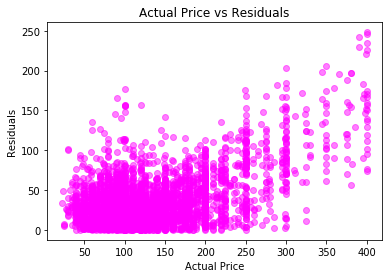

In [78]:
plt.scatter(x=new_data['Price'],y=new_data['Residuals'],color = "magenta" ,alpha=0.5)
plt.title('Actual Price vs Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

Text(0, 0.5, 'Predicted Price')

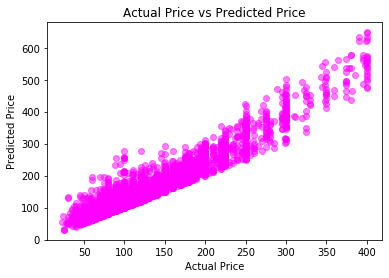

In [79]:
plt.scatter(x=new_data['Price'],y=new_data['Predicted_price'],color = "magenta" ,alpha=0.5)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')